In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("preprocesamiento base de datos.csv")

De acuerdo a las 4 bases de datos entregadas por Soy Tutor, se hace una unión de éstas con las columnas que consideramos que son clave para poder analizar una tendencia sobre el performance del tutor.

El diccionario de variables quedaría de la siguiente manera:

**ID_Tutor**: Se refiere al id asociado a cada uno de los tutores

**Correo_tutor**: Es el correo de los tutores que estan desplegados en la lista

**carrera_tutor**: Es la carrera que actualmente cursa el tutor

**tipo_tutor**: Se refiere al tipo de tutor, para este caso existen 3 tipos de tutores distintos :

1 = Tutor: Servicio Becario

2 = Tutor: Servicio Social

6= Tutor: Tec Milenio

**Status_tutoría**:  Es el estatus de la tutoria, existen 11 estatus diferentes

-10 = Ninguno (tutor y alumno) se conectó a la sesión de tutoring.

-9 = Tutor NO se conectó a la sesión y Alumno SÍ se conectó.

-8 = Alumno NO se conectó a la sesión y Tutor SÍ se conectó.

-7 = Alumno en espera de que Tutor se conecte a la sesión de tutoring.

-6 = Tutor en espera de que Alumno se conecte a la sesión de tutoring.

-3 = Sesión de tutoring cancelada por Tutor.

-1 = Sesión pendiente de aceptar/rechazar por parte del Tutor. (No Aplica)

0 = Sesión de tutoring aceptada. (En automático)

2 = Sesión cancelada.

4 = Sesión de tutoring finalizada exitosamente

5 = Sesión finalizada por el Tutor. (antes de tiempo)

**IDAppointment**: Es el Id asociado a cada una de las retroalimentaciones dadas por los tutores o alumnos

**categoria_principal**: Es la primera categoria de las tutorias que puede impartir el tutor

**subcategoria_principal**: Es la primera subcategoria de las tutorias que puede impartir el tutor

**categoria_secundaria**: Es la segunda categoria de las tutorias que puede impartir el tutor

**subcatgoria_secundaria**: Es la segunda subcategoria de las tutorias que puede impartir el tutor

**Desempeño_Tutor**: es la calificación obtenida por el tutor en su evaluación bajo el tipo de pregunta Estrellas = Rango es del 1-5 donde 1 es la califación más baja y 5 la más alta.

**Meta_Tutoría**: es la calificación donde el alumno percibe si la tutoría alcanzó sus objetivos deseados bajo el tipo de pregunta Radio = Rango es del 1-5 (Muy en Desacuerdo, En Desacuerdo, Neutral, De Acuerdo, Muy en Deacuerdo)

In [3]:
df.head()

,ID_Tutor,correo_tutor,carrera_tutor,tipo_tutor,Status_Tutoría,IDAppointment,categoria_principal,subcategoria_principal,categoría_secundaria,subcategoria_secundaria,Desempeño_Tutor,Meta_Tutoría
0,14566,a01178149@tec.mx,Ingenier’a - Bioingenier’a y Procesos Qu’micos...,1,4,8361,Química,Enlaces químicos e interacciones intermolecucl...,Matemáticas,"Cálculo de derivadas mediante reglas, fórmulas...",1,#N/D
1,19866,a01750754@tec.mx,#N/D,1,4,8504,Matemáticas,Magnitudes y números reales,Preparación a la Universidad,ITESM,5,5
2,15823,a01385118@tec.mx,#N/D,#N/D,4,7754,#N/D,#N/D,#N/D,#N/D,#N/D,#N/D
3,14074,a01658389@tec.mx,#N/D,#N/D,4,7107,#N/D,#N/D,#N/D,#N/D,5,0
4,19886,A01745719@tec.mx,#N/D,#N/D,4,8609,#N/D,#N/D,#N/D,#N/D,5,5


In [4]:
df.count()


ID_Tutor                   11463
correo_tutor               11463
carrera_tutor              11463
tipo_tutor                 11463
Status_Tutoría             11463
IDAppointment              11463
categoria_principal        11463
subcategoria_principal     11463
categoría_secundaria       11463
subcategoria_secundaria    11463
Desempeño_Tutor            11463
Meta_Tutoría               11463
dtype: int64

In [5]:
df.describe()

,ID_Tutor,Status_Tutoría,IDAppointment
count,11463.000000,11463.000000,11463.000000
mean,15161.823345,4.025735,7788.061502
std,2284.171680,0.839991,713.711349
min,10075.000000,-10.000000,6289.000000
25%,13957.000000,4.000000,7259.000000
50%,14584.000000,4.000000,7751.000000
75%,15484.000000,4.000000,8360.000000
max,22382.000000,5.000000,9456.000000


In [6]:
#revisamos si existen datos faltante en alguna columna

df.isnull().any()

ID_Tutor                   False
correo_tutor               False
carrera_tutor              False
tipo_tutor                 False
Status_Tutoría             False
IDAppointment              False
categoria_principal        False
subcategoria_principal     False
categoría_secundaria       False
subcategoria_secundaria    False
Desempeño_Tutor            False
Meta_Tutoría               False
dtype: bool

In [7]:
df.dtypes

ID_Tutor                    int64
correo_tutor               object
carrera_tutor              object
tipo_tutor                 object
Status_Tutoría              int64
IDAppointment               int64
categoria_principal        object
subcategoria_principal     object
categoría_secundaria       object
subcategoria_secundaria    object
Desempeño_Tutor            object
Meta_Tutoría               object
dtype: object

In [8]:
#se reemplaza los valores "#N/D" por un valor nulo para considerarlo como valor faltante

df.replace("#N/D",np.nan, inplace=True)

In [9]:
#eliminamos las filas que contengan algún valor faltante.

df_final=df.dropna()

In [10]:
#validamos la cantidad de valores por cada una de las columnas una vez eliminado los valores faltantes

df_final.count()

ID_Tutor                   1128
correo_tutor               1128
carrera_tutor              1128
tipo_tutor                 1128
Status_Tutoría             1128
IDAppointment              1128
categoria_principal        1128
subcategoria_principal     1128
categoría_secundaria       1128
subcategoria_secundaria    1128
Desempeño_Tutor            1128
Meta_Tutoría               1128
dtype: int64

Una vez eliminado todos los valores faltantes y que la base de datos es reducida pordemos empezar a analizar algunas tendencias sobre los datos a procesar.

Pero antes es importante mencionar que la reducción de la base de datos fue significativa ya que de las poco más de 11 mil filas, nos quedamos con soamente 1128 filas a analizar

La gran mayoría de los tutores que están registrados en la plataforma, están trabajando como parte de su servicio de becario.


In [11]:
df_final["tipo_tutor"].value_counts()

1    1120
2       8
Name: tipo_tutor, dtype: int64

predominan las tutorías que fueron terminandas con éxito en tiempo y forma, aunque el status con más menciones que le sigue es el que las tutorías se dieron pero acabaron antes de tiempos

In [12]:
df_final["Status_Tutoría"].value_counts()

 4     1054
 5       65
-10       9
Name: Status_Tutoría, dtype: int64

La especialidad principal de los tutores es de Matemáticas

In [13]:
df_final["categoria_principal"].value_counts()

Matemáticas                     811
Física                          111
Química                          94
Programación                     64
Preparación a la Universidad     35
Soporte Técnico                  13
Name: categoria_principal, dtype: int64

En general, los alumnos están satisfechos con el desempeño de sus tutores.

In [14]:
df_final["Desempeño_Tutor"].value_counts()

5    1055
4      63
2       5
3       5
Name: Desempeño_Tutor, dtype: int64

En general, los alumnos perciben que sus objetivos académicos por los que asisten a la tutoría son cumplidos.

In [15]:
df_final["Meta_Tutoría"].value_counts()

5    679
4    312
3     67
0     55
2     10
1      5
Name: Meta_Tutoría, dtype: int64

In [16]:
df_final.head()

,ID_Tutor,correo_tutor,carrera_tutor,tipo_tutor,Status_Tutoría,IDAppointment,categoria_principal,subcategoria_principal,categoría_secundaria,subcategoria_secundaria,Desempeño_Tutor,Meta_Tutoría
14,12021,a01027074@tec.mx,"Derecho, Econom’a y Relaciones Internacionales...",1,4,6825,Matemáticas,"Cálculo de derivadas mediante reglas, fórmulas...",Matemáticas,Integrales,5,5
15,14869,A00835528@tec.mx,Ingenier’a - Innovaci—n y Transformaci—n (aven...,1,4,8048,Física,Leyes de los movimientos,Ciencias Sociales,Programación,5,5
18,14213,A01285253@tec.mx,Licenciado en Mercadotecnia,1,4,7332,Matemáticas,Ecuaciones lineales,Preparación a la Universidad,ITESM,5,0
38,12024,a00835084@tec.mx,Ingenier’a - Innovaci—n y Transformaci—n (aven...,1,4,7724,Matemáticas,Integrales,Matemáticas,Calculo,5,0
40,12281,A01275608@tec.mx,"Derecho, Econom’a y Relaciones Internacionales...",1,4,6525,Matemáticas,"Ángulos, triángulos y relaciones trigonométricas",Matemáticas,Ecuaciones lineales,5,5


In [17]:
df_final.dtypes

ID_Tutor                    int64
correo_tutor               object
carrera_tutor              object
tipo_tutor                 object
Status_Tutoría              int64
IDAppointment               int64
categoria_principal        object
subcategoria_principal     object
categoría_secundaria       object
subcategoria_secundaria    object
Desempeño_Tutor            object
Meta_Tutoría               object
dtype: object

In [18]:
df_final["tipo_tutor"]=df_final["tipo_tutor"].astype("int64")

<ipython-input-18-326b291f4a89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["tipo_tutor"]=df_final["tipo_tutor"].astype("int64")


In [19]:
df_final["Desempeño_Tutor"]=df_final["Desempeño_Tutor"].astype("int64")

<ipython-input-19-2fe9af29ceb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["Desempeño_Tutor"]=df_final["Desempeño_Tutor"].astype("int64")


In [20]:
df_final["Meta_Tutoría"]=df_final["Meta_Tutoría"].astype("int64")

<ipython-input-20-1c724e1128cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["Meta_Tutoría"]=df_final["Meta_Tutoría"].astype("int64")


In [21]:
df_final.dtypes

ID_Tutor                    int64
correo_tutor               object
carrera_tutor              object
tipo_tutor                  int64
Status_Tutoría              int64
IDAppointment               int64
categoria_principal        object
subcategoria_principal     object
categoría_secundaria       object
subcategoria_secundaria    object
Desempeño_Tutor             int64
Meta_Tutoría                int64
dtype: object

In [22]:
df_final.corr()

<ipython-input-22-dcfd88b6da59>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_final.corr()


,ID_Tutor,tipo_tutor,Status_Tutoría,IDAppointment,Desempeño_Tutor,Meta_Tutoría
ID_Tutor,1.000000,-0.126224,0.025470,0.622149,0.011415,-0.169424
tipo_tutor,-0.126224,1.000000,-0.428214,-0.140004,0.020120,0.048534
Status_Tutoría,0.025470,-0.428214,1.000000,0.089653,-0.010119,-0.068319
IDAppointment,0.622149,-0.140004,0.089653,1.000000,-0.030069,-0.209379
Desempeño_Tutor,0.011415,0.020120,-0.010119,-0.030069,1.000000,0.222403
Meta_Tutoría,-0.169424,0.048534,-0.068319,-0.209379,0.222403,1.000000


También se analizan los datos de 3 bases adicionales las cuales representan el tipo de vacantes que los tutores pueden estar interesados en aplicar de acuerdo a sus apitudes.

# Estructura de los Datos

La exploración inicial de datos es un paso crucial en cualquier proyecto de análisis de datos. Proporciona una visión general de los datos disponibles y ayuda a comprender la estructura, la calidad y la información contenida en el conjunto de datos.

In [23]:
import pandas as pd

# Carga de los archivos CSV
data_scientists = pd.read_csv('/content/data_scientists.csv')
industrial_engineers = pd.read_csv('/content/industrial_engineers.csv')
software_engineers = pd.read_csv('/content/software_engineers.csv')

# Visualización de las primeras filas de cada conjunto de datos para entender su estructura
print("Data Scientists:")
print(data_scientists.head())
print("\nIndustrial Engineers:")
print(industrial_engineers.head())
print("\nSoftware Engineers:")
print(software_engineers.head())

Data Scientists:
   Unnamed: 0                               jobtitle  \
0           0  Lecturer In Discipline | Data Science   
1           1    Data Scientist / Management Analyst   
2           2                         Data Scientist   
3           3                         Data Scientist   
4           4                    Tech Data Scientist   

                                      jobdescription     experience  
0  <p>The Department of Computer Science at Colum...  No experience  
1  ENGINEERING: \n\tH2O.ai, Inc. requires a Data ...  No experience  
2  Research Associate (Research Institute at Nati...  No experience  
3  <p>Data Scientist sought by zulily, LLC. in Se...  No experience  
4  Tech Data Scientist sought by Zulily in Seattl...  No experience  

Industrial Engineers:
   Unnamed: 0                                          jobtitle  \
0           0                               Industrial Engineer   
1           1                               Industrial Engineer   
2 

In [24]:
# Descripción general de los datos
print("\nDescripción general de los Data Scientists:")
print(data_scientists.info())
print("\nDescripción general de los Industrial Engineers:")
print(industrial_engineers.info())
print("\nDescripción general de los Software Engineers:")
print(software_engineers.info())


Descripción general de los Data Scientists:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      169 non-null    int64 
 1   jobtitle        169 non-null    object
 2   jobdescription  169 non-null    object
 3   experience      169 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.4+ KB
None

Descripción general de los Industrial Engineers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      59 non-null     int64 
 1   jobtitle        59 non-null     object
 2   jobdescription  59 non-null     object
 3   experience      59 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.0+ KB
None

Descripción general de los Software Engineers:
<class 'panda

In [25]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas de los Data Scientists:")
print(data_scientists.describe())
print("\nEstadísticas descriptivas de los Industrial Engineers:")
print(industrial_engineers.describe())
print("\nEstadísticas descriptivas de los Software Engineers:")
print(software_engineers.describe())


Estadísticas descriptivas de los Data Scientists:
       Unnamed: 0
count  169.000000
mean    84.000000
std     48.930222
min      0.000000
25%     42.000000
50%     84.000000
75%    126.000000
max    168.000000

Estadísticas descriptivas de los Industrial Engineers:
       Unnamed: 0
count   59.000000
mean    29.000000
std     17.175564
min      0.000000
25%     14.500000
50%     29.000000
75%     43.500000
max     58.000000

Estadísticas descriptivas de los Software Engineers:
        Unnamed: 0
count  2375.000000
mean   1187.000000
std     685.747767
min       0.000000
25%     593.500000
50%    1187.000000
75%    1780.500000
max    2374.000000


In [26]:
# Identificación de valores faltantes
print("\nValores faltantes en Data Scientists:")
print(data_scientists.isnull().sum())
print("\nValores faltantes en Industrial Engineers:")
print(industrial_engineers.isnull().sum())
print("\nValores faltantes en Software Engineers:")
print(software_engineers.isnull().sum())


Valores faltantes en Data Scientists:
Unnamed: 0        0
jobtitle          0
jobdescription    0
experience        0
dtype: int64

Valores faltantes en Industrial Engineers:
Unnamed: 0        0
jobtitle          0
jobdescription    0
experience        0
dtype: int64

Valores faltantes en Software Engineers:
Unnamed: 0        0
jobtitle          0
jobdescription    0
experience        0
dtype: int64



Descripción de Columnas:
*   Los conjuntos de datos de Data Scientists, Industrial Engineers, y Software Engineers consisten en anuncios de trabajo con cuatro columnas: Unnamed: 0 (un índice numérico), jobtitle (título del trabajo), jobdescription (descripción del trabajo), y experience (experiencia requerida).

Tipos de Datos y Estructura:
*   La columna Unnamed: 0 es numérica y parece funcionar como un índice. Las otras tres columnas son de tipo texto (object en Pandas), lo que indica que contienen información textual.
*   La consistencia en la estructura entre los tres conjuntos de datos facilita un análisis comparativo.

Observaciones Iniciales:
*   La presencia de columnas de texto sugiere que un análisis detallado del lenguaje natural podría ser útil, especialmente en las columnas jobtitle y jobdescription.
*   La columna experience podría categorizarse o analizarse para entender los niveles de experiencia solicitados en los distintos roles.

Ausencia de Valores Faltantes:
*   Un aspecto positivo es que no hay valores faltantes en ninguna de las columnas de los tres conjuntos de datos, lo que indica una buena integridad de los datos.

Consideraciones para Análisis Futuros:
*   Dado que las columnas principales son textuales, técnicas de procesamiento de lenguaje natural (NLP) podrían ser muy útiles para extraer tendencias, habilidades comunes, y otros insights de los textos de las descripciones de trabajo.
*   La comparación entre los campos de Data Scientists, Industrial Engineers, y Software Engineers podría revelar diferencias interesantes en términos de habilidades requeridas y niveles de experiencia.



---



# Análisis Univariante

El Análisis Univariante se centra en la exploración de variables de forma individual. Su objetivo principal es comprender las características y distribuciones de las variables en un conjunto de datos.


Análisis Univariante para Data Scientists


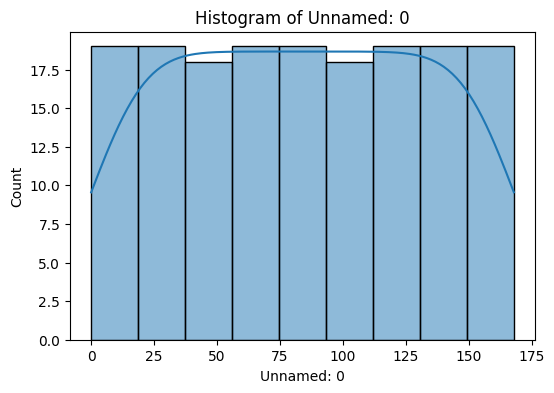

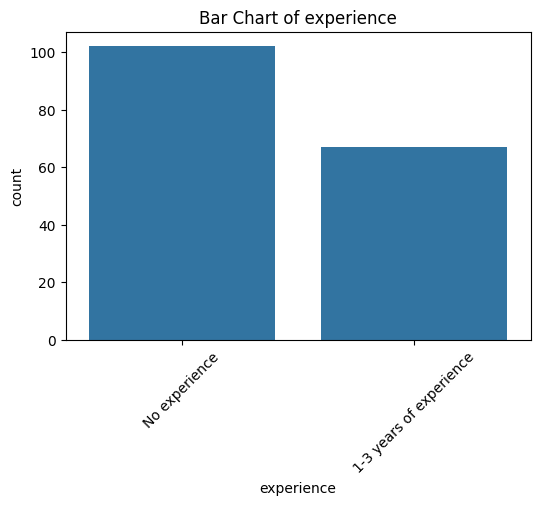


Análisis Univariante para Industrial Engineers


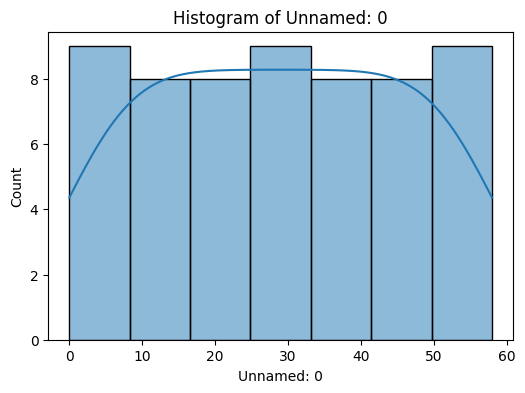

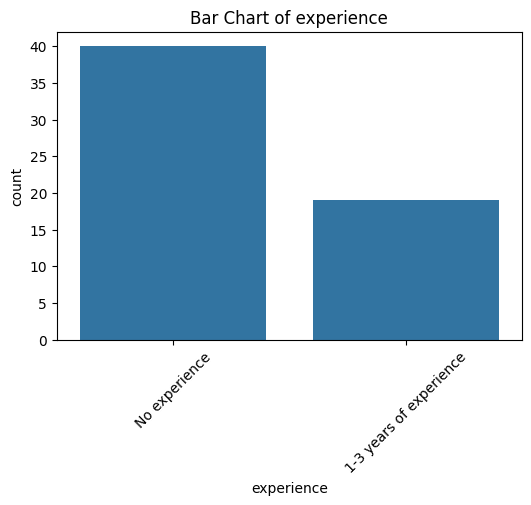


Análisis Univariante para Software Engineers


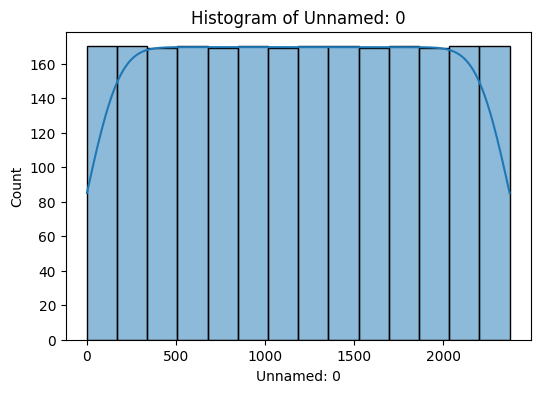

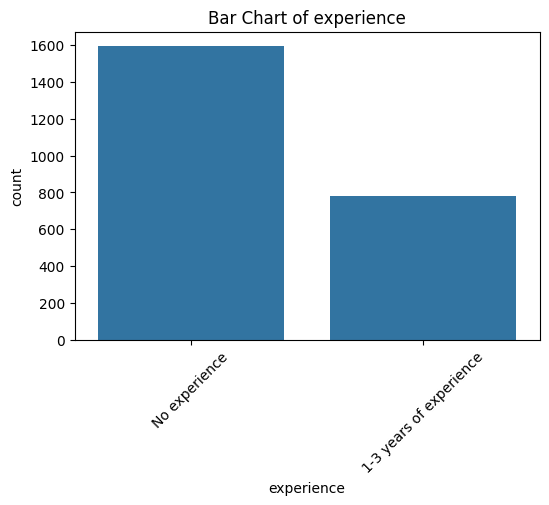

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Función para realizar análisis univariante
def univariate_analysis(data, title):
    print(f"\nAnálisis Univariante para {title}")
    num_vars = data.select_dtypes(include=['int64', 'float64']).columns
    cat_vars = data.select_dtypes(include=['object']).columns

    # Análisis para variables numéricas
    for var in num_vars:
        plt.figure(figsize=(6, 4))
        sns.histplot(data[var], kde=True)
        plt.title(f'Histogram of {var}')
        plt.show()

    # Análisis para variables categóricas
    for var in cat_vars:
        if data[var].nunique() <= 10:  # Filtrar variables con alta cardinalidad
            plt.figure(figsize=(6, 4))
            sns.countplot(x=var, data=data)
            plt.title(f'Bar Chart of {var}')
            plt.xticks(rotation=45)
            plt.show()

# Ejecución del análisis univariante simplificado para cada conjunto de datos
univariate_analysis(data_scientists, "Data Scientists")
univariate_analysis(industrial_engineers, "Industrial Engineers")
univariate_analysis(software_engineers, "Software Engineers")

Hallazgos Generales:
*   Los histogramas para la columna 'Unnamed: 0', indican la frecuencia o el número de posiciones listadas en ciertos rangos. La distribución uniforme sugiere que hay una cantidad similar de listados de trabajos a través del rango de índices en los conjuntos de datos.
*   En los tres conjuntos de datos (Data Scientists, Industrial Engineers y Software Engineers), la mayoría de los individuos tienen 'No experience' o '1-3 years of experience'.
*   Parece haber un número significativamente mayor de individuos sin experiencia en comparación con aquellos que tienen 1-3 años de experiencia, sugiriendo que los puestos de nivel de entrada o sin requisitos de experiencia previa son más comunes en estos campos.

Tendencias y Patrones Generales:
*   La consistencia en la cantidad de listados de trabajo a través de los conjuntos de datos sugiere una recopilación de datos estable y uniforme, sin sesgos evidentes hacia periodos o categorías específicas de trabajos.
*   La predominancia de listados que no requieren experiencia sugiere que los campos están abiertos a nuevos talentos y que puede haber una demanda de trabajadores dispuestos a aprender y crecer en el puesto.





---



# Análisis Bi/Multivariante

En esta sección, ampliaremos nuestra exploración más allá de las características individuales para analizar las relaciones y las interacciones entre las variables.

Dado que los conjuntos de datos incluyen variables categóricas y la columna 'Unnamed: 0' no proporciona una variable numérica significativa para el análisis de correlación, necesitaremos aplicar métodos de análisis de correlación adecuados para variables categóricas.


Análisis Bi/Multivariante para Data Scientists


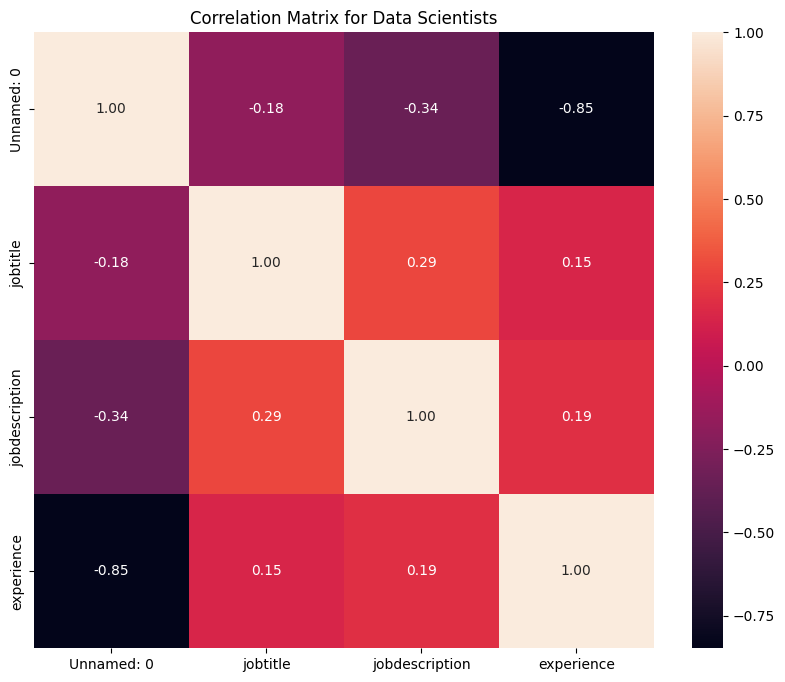


Análisis Bi/Multivariante para Industrial Engineers


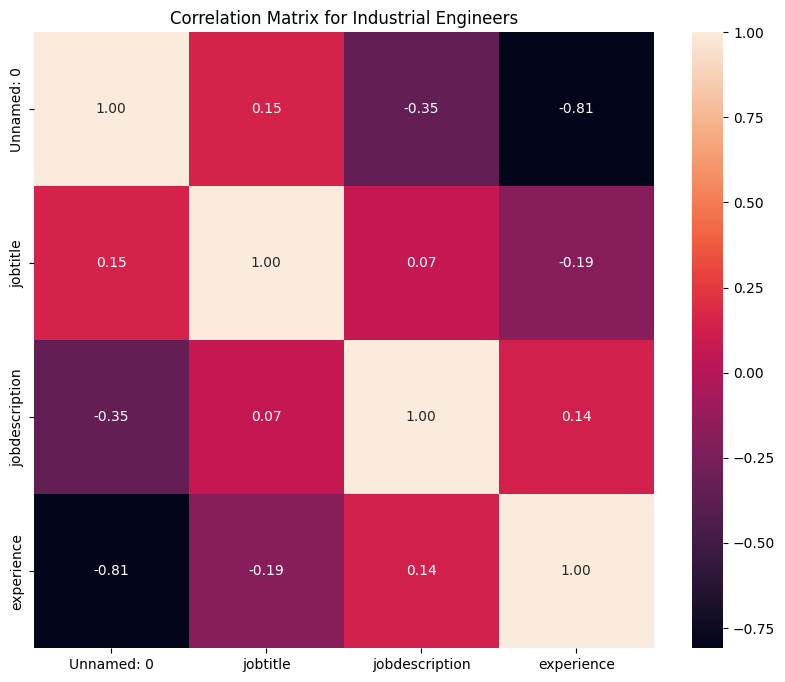


Análisis Bi/Multivariante para Software Engineers


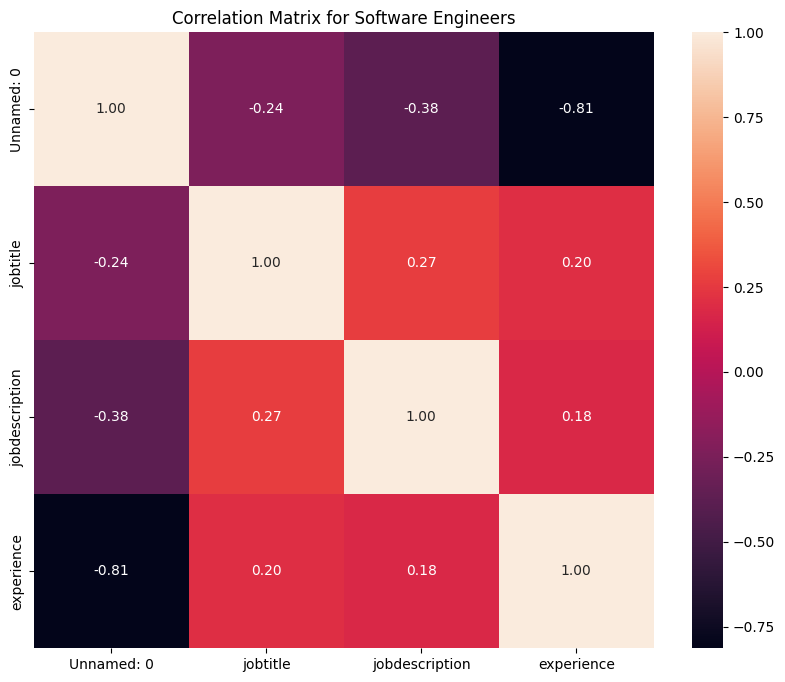

In [28]:
from sklearn.preprocessing import LabelEncoder

# Función para realizar análisis bi/multivariante
def multivariate_analysis(data, title):
    print(f"\nAnálisis Bi/Multivariante para {title}")

    # Preprocesamiento: Codificación de etiquetas para las variables categóricas
    label_encoder = LabelEncoder()
    encoded_data = data.copy()
    for column in encoded_data.select_dtypes(include=['object']).columns:
        encoded_data[column] = label_encoder.fit_transform(encoded_data[column])

    # Calcular la matriz de correlación usando el método de Spearman
    correlation_matrix = encoded_data.corr(method='spearman')

    # Visualizar la matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
    plt.title(f'Correlation Matrix for {title}')
    plt.show()

# Cargar los archivos CSV
data_scientists = pd.read_csv('/content/data_scientists.csv')
industrial_engineers = pd.read_csv('/content/industrial_engineers.csv')
software_engineers = pd.read_csv('/content/software_engineers.csv')

# Ejecutar el análisis bi/multivariante para cada conjunto de datos
multivariate_analysis(data_scientists, "Data Scientists")
multivariate_analysis(industrial_engineers, "Industrial Engineers")
multivariate_analysis(software_engineers, "Software Engineers")

Para Data Scientists:
*   Existe una correlación negativa fuerte (-0.85) entre 'experience' y 'Unnamed: 0', lo que podría sugerir que las entradas con índices más bajos tienden a requerir experiencia, mientras que las más recientes tienden a no requerirla. Sin embargo, como 'Unnamed: 0' es probablemente un identificador o contador, esta correlación puede no ser significativa.
*   Hay una correlación positiva moderada (0.29) entre 'jobdescription' y 'jobtitle', lo que podría indicar que ciertos títulos de trabajo tienden a tener descripciones similares o viceversa. Esto podría reflejar un estándar en la descripción de trabajos para títulos específicos.

Para Industrial Engineers:
*   Al igual que con los Data Scientists, hay una correlación negativa fuerte (-0.81) entre 'experience' y 'Unnamed: 0'. Esto podría indicar una tendencia similar donde las entradas más antiguas requieren experiencia, pero también puede ser un artefacto del orden de los datos.
*   La correlación entre 'jobdescription' y 'jobtitle' es baja (0.07), lo que sugiere que no hay una relación fuerte entre cómo se describen los trabajos y los títulos de trabajo asignados.

Para Software Engineers:
*   Se observa una correlación negativa fuerte (-0.81) entre 'experience' y 'Unnamed: 0', lo que es consistente con los otros conjuntos de datos y sugiere una tendencia similar que podría ser debida al orden en que se recopilaron los datos.
*   Existe una correlación positiva débil (0.27) entre 'jobdescription' y 'jobtitle', indicando que puede haber alguna relación entre los títulos de trabajo y las descripciones, aunque no es tan fuerte como en el conjunto de datos de Data Scientists.

Hallazgos Generales y Patrones:
*   Las correlaciones entre 'jobtitle' y 'jobdescription' varían entre los conjuntos de datos, lo que puede reflejar diferencias en cómo se estructuran los roles en cada campo. En el conjunto de Data Scientists, la correlación es más fuerte, lo que podría indicar una mayor estandarización en la forma en que se anuncian estos trabajos.

Consideraciones:
*   Las correlaciones deben interpretarse con cuidado ya que se basan en datos categóricos codificados numéricamente, lo que puede no siempre capturar relaciones significativas.



---



# Preprocesamiento

En el análisis de datos, particularmente cuando se trata de texto, es esencial realizar una limpieza exhaustiva para asegurar la calidad y la coherencia de la información. Los conjuntos de datos a menudo contienen ruido en forma de etiquetas HTML, caracteres especiales, y espacios adicionales, especialmente cuando los datos provienen de fuentes en línea o de scraping de sitios web.

In [29]:
import re  # Importar el módulo 're' para expresiones regulares

def clean_text(text):
    """
    Limpia el texto eliminando etiquetas HTML, caracteres especiales, espacios extra,
    y potenciales identificadores de empresas.
    Args:
        text (str): Texto a limpiar.
    Returns:
        str: Texto limpiado.
    """
    # Remover etiquetas HTML
    clean = re.sub(r'<.*?>', '', text)
    # Remover caracteres especiales y múltiples espacios
    clean = re.sub(r'[^a-zA-Z\s]', '', clean)
    # Remover algunos identificadores de empresas (patrones como números o códigos alfanuméricos)
    clean = re.sub(r'\b[A-Z0-9]+\b', '', clean)
    # Reducir múltiples espacios a un espacio simple
    clean = re.sub(r'\s+', ' ', clean)
    # Eliminar espacios al principio y al final
    return clean.strip()

# Aplicar la limpieza a 'jobtitle' y 'jobdescription'
data_scientists['jobtitle'] = data_scientists['jobtitle'].apply(clean_text)
industrial_engineers['jobtitle'] = industrial_engineers['jobtitle'].apply(clean_text)
software_engineers['jobtitle'] = software_engineers['jobtitle'].apply(clean_text)

data_scientists['jobdescription'] = data_scientists['jobdescription'].apply(clean_text)
industrial_engineers['jobdescription'] = industrial_engineers['jobdescription'].apply(clean_text)
software_engineers['jobdescription'] = software_engineers['jobdescription'].apply(clean_text)

In [30]:
# Verificar la limpieza en 'jobtitle' y 'jobdescription' para una muestra aleatoria de filas
num_samples = 5  # Número de muestras para inspeccionar

print("Muestra de 'jobtitle' limpiado en Data Scientists:")
print(data_scientists['jobtitle'].sample(num_samples))
print("\nMuestra de 'jobdescription' limpiado en Data Scientists:")
print(data_scientists['jobdescription'].sample(num_samples))

print("\nMuestra de 'jobtitle' limpiado en Industrial Engineers:")
print(industrial_engineers['jobtitle'].sample(num_samples))
print("\nMuestra de 'jobdescription' limpiado en Industrial Engineers:")
print(industrial_engineers['jobdescription'].sample(num_samples))

print("\nMuestra de 'jobtitle' limpiado en Software Engineers:")
print(software_engineers['jobtitle'].sample(num_samples))
print("\nMuestra de 'jobdescription' limpiado en Software Engineers:")
print(software_engineers['jobdescription'].sample(num_samples))

Muestra de 'jobtitle' limpiado en Data Scientists:
21     Senior Lecturer in Computational Science and D...
148                                        Data Engineer
47                                 Senior Data Scientist
113                     Data Science Postdoctoral Fellow
134            Data Engineer Full Time Multiple Openings
Name: jobtitle, dtype: object

Muestra de 'jobdescription' limpiado en Data Scientists:
145    Design develop troubleshoot evaluate and deplo...
166    Syngenta Crop Protection seeks a fulltime Data...
81     Scientists Data Scientists Multiple Openings R...
104    Capital One Services in Richmond Mult pos avai...
19     Capital One Services in Richmond Mult pos avai...
Name: jobdescription, dtype: object

Muestra de 'jobtitle' limpiado en Industrial Engineers:
22    Industrial Engineering Technology Faculty Member
36                                 Industrial Engineer
15                                 Industrial Engineer
41                   Manufacturin

In [31]:
# Exportar los datos limpios a un archivo CSV para explorar
industrial_engineers.to_csv('/content/clean_industrial_engineers.csv', index=False)



---



Aunque en este momento no hay valores faltantes en los conjuntos de datos. Aún así, crear esta función es una buena práctica por si en el futuro se agregan nuevos datos que sí tengan valores faltantes.

In [32]:
# Función para manejar valores faltantes
def handle_missing_values(data):

    # Reportar el manejo de valores faltantes
    print(f"Manejando valores faltantes para el conjunto de datos...")
    for col in data.columns:
        missing_count = data[col].isnull().sum()
        if missing_count > 0:
            if data[col].dtype == 'float64' or data[col].dtype == 'int64':
                # Imputar con la media para variables numéricas
                data[col].fillna(data[col].mean(), inplace=True)
                print(f"Imputado {missing_count} valores faltantes en la columna numérica '{col}' con la media.")
            else:
                # Imputar con la moda para variables categóricas
                data[col].fillna(data[col].mode()[0], inplace=True)
                print(f"Imputado {missing_count} valores faltantes en la columna categórica '{col}' con la moda.")
    return data

# Aplicar el manejo de valores faltantes a cada conjunto de datos
data_scientists = handle_missing_values(data_scientists)
industrial_engineers = handle_missing_values(industrial_engineers)
software_engineers = handle_missing_values(software_engineers)


Manejando valores faltantes para el conjunto de datos...
Manejando valores faltantes para el conjunto de datos...
Manejando valores faltantes para el conjunto de datos...




---



Los valores atípicos son observaciones en los datos que son significativamente diferentes del resto. En los conjuntos de datos que se están analizando, la mayoría de las variables son categóricas, como 'jobtitle', 'jobdescription', y 'experience'. En el caso de las variables categóricas, el concepto de "valores atípicos" no se aplica de la misma manera que con las variables numéricas. Los valores atípicos son típicamente un concepto relacionado con datos numéricos, donde se pueden identificar observaciones que se desvían significativamente del resto de los datos. Para las variables categóricas, en lugar de valores atípicos, se podría considerar categorías que son muy poco frecuentes en comparación con otras.



In [33]:
def analyze_less_frequent_categories(data, threshold=0.02):
    """
    Identifica y muestra las categorías menos frecuentes en las variables categóricas.
    Args:
        data (DataFrame): El DF a analizar.
        threshold (float): El umbral de frecuencia por debajo del cual una categoría se considera menos frecuente.
    """
    cat_columns = data.select_dtypes(include=['object']).columns
    for col in cat_columns:
        print(f"Análisis de categorías menos frecuentes para la columna '{col}':")
        frequency = data[col].value_counts(normalize=True)
        less_frequent_categories = frequency[frequency < threshold]
        if less_frequent_categories.empty:
            print("  No se encontraron categorías menos frecuentes.")
        else:
            print(f"  Categorías menos frecuentes (frecuencia < {threshold}):")
            print(less_frequent_categories)
        print()

# Ejemplo de uso
analyze_less_frequent_categories(data_scientists, threshold=0.02)
analyze_less_frequent_categories(industrial_engineers, threshold=0.02)
analyze_less_frequent_categories(software_engineers, threshold=0.02)

Análisis de categorías menos frecuentes para la columna 'jobtitle':
  Categorías menos frecuentes (frecuencia < 0.02):
Data Scientists                                                                                                                0.017751
Data Engineer Full Time Multiple Openings                                                                                      0.011834
Lead Data Engineer                                                                                                             0.011834
Data Engineer Sr                                                                                                               0.011834
Senior Big Data Engineer                                                                                                       0.011834
Senior Lecturer in Computational Science and Data Science                                                                      0.011834
senior data scientist                                            

Interpretaciones:
*   La presencia de múltiples títulos de trabajo menos comunes en cada conjunto de datos sugiere que hay una variedad de roles especializados en cada campo.
*   Esto puede ser relevante para la comprensión de la diversidad y especialización dentro de estas profesiones.
*   La ausencia de categorías menos frecuentes en 'experience' sugiere que la experiencia requerida está bastante estandarizada o que no hay una gran diversidad en los niveles de experiencia solicitados en los anuncios de trabajo.



---



En el análisis de datos, especialmente cuando se trabaja con variables categóricas, un desafío común es manejar la alta cardinalidad. La cardinalidad se refiere al número de elementos únicos en una variable. Una variable categórica con alta cardinalidad tiene una gran cantidad de categorías distintas, lo cual puede presentar varios desafíos en el análisis de datos.

Lo anterior aplicando para:
*   jobtitle: Título del trabajo
*   experience': Experiencia requerida para el trabajo

In [34]:
def handle_high_cardinality(data, num_top_categories=20):
    # Lista de columnas a las que aplicaremos el manejo de alta cardinalidad
    columns_to_handle = ["jobtitle", "experience"]

    for col in columns_to_handle:
        if col in data.columns:
            # Obtener las categorías más frecuentes
            top_categories = data[col].value_counts().nlargest(num_top_categories).index
            # Consolidar categorías menos frecuentes en 'Other'
            data[col] = data[col].where(data[col].isin(top_categories), 'Other')
    return data

# Aplicar el manejo de alta cardinalidad solo a las columnas "jobtitle" y "experience"
data_scientists = handle_high_cardinality(data_scientists)
industrial_engineers = handle_high_cardinality(industrial_engineers)
software_engineers = handle_high_cardinality(software_engineers)

In [35]:
def display_top_categories(data, num_categories=20):
    # Lista de columnas a mostrar
    columns_to_display = ["jobtitle", "experience"]

    for col in columns_to_display:
        if col in data.columns:
            print(f"Distribución de categorías para '{col}':")
            print(data[col].value_counts().head(num_categories))
            print()

# Mostrar las categorías más frecuentes solo para las columnas "jobtitle" y "experience"
print("Categorías en Data Scientists:")
display_top_categories(data_scientists)

print("Categorías en Industrial Engineers:")
display_top_categories(industrial_engineers)

print("Categorías en Software Engineers:")
display_top_categories(software_engineers)

Categorías en Data Scientists:
Distribución de categorías para 'jobtitle':
Other                                                        50
Data Scientist                                               35
Data Engineer                                                20
                                                              9
Senior Data Engineer                                          7
Data Engineer Lead                                            6
Senior Data Scientist                                         6
data engineer                                                 4
Sr Data Scientist                                             4
Senior Data Engineers                                         4
data scientist                                                4
Data Scientists                                               3
Data Engineer Full Time Multiple Openings                     2
Lead Data Engineer                                            2
Senior Big Data Engineer     



---



#**Conclusiones Preprocesamiento**

En esta primera etapa de exploración y análisis de datos, hemos logrado obtener una visión general de los conjuntos de datos que representan las categorías profesionales de Data Scientists, Industrial Engineers y Software Engineers.

Si bien hemos realizado un análisis inicial, queda claro que el potencial de estos datos va más allá de lo explorado hasta ahora. Para futuras etapas es importante considerar lo siguiente:
*   Aumento de la cantidad de datos: Para obtener una imagen más completa y representativa del mercado laboral.
*   Análisis de descripciones de puestos: Las descripciones de los trabajos contienen información valiosa sobre habilidades requeridas, sueldos, ubicación, características del rol, educación, responsabilidades, conocimientos, entre otros detalles. En las siguientes etapas, se debe realizar un análisis más profundo de estos textos para extraer información clave.





---



# **Codificación One-Hot para base de datos de vacantes**

Para el caso de estas tres bases de datos, las cuales son conformadas por tres variables categóricas empezamos codificando con un One-Hone para convertir dichas variables en datos numéricos y así empezar con la estandarización de los datos.

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [37]:
# Aplicación de One-Hot Encoding a las variables categóricas 'jobtitle', 'jobdescription' y 'experience'
column_transformer = ColumnTransformer(
    [
        ('jobs_coding', OneHotEncoder(sparse_output=False),
         ['jobtitle', 'jobdescription', 'experience'])
    ],
    remainder='passthrough'
)

# Ajustamos el transformador al DataFrame y convertimos la salida a un DataFrame de pandas
df_transformed_array = column_transformer.fit_transform(data_scientists)
data_scientists_transformed = pd.DataFrame(df_transformed_array, columns=column_transformer.get_feature_names_out())

# Obtenemos el encoder del ColumnTransformer
encoder = column_transformer.named_transformers_['jobs_coding']

In [38]:
# Aplicación de One-Hot Encoding a las variables categóricas 'jobtitle', 'jobdescription' y 'experience'
column_transformer = ColumnTransformer(
    [
        ('jobs_coding', OneHotEncoder(sparse_output=False),
         ['jobtitle', 'jobdescription', 'experience'])
    ],
    remainder='passthrough'
)

# Ajustamos el transformador al DataFrame y convertimos la salida a un DataFrame de pandas
df_transformed_array = column_transformer.fit_transform(industrial_engineers)
industrial_engineers_transformed = pd.DataFrame(df_transformed_array, columns=column_transformer.get_feature_names_out())

# Obtenemos el encoder del ColumnTransformer
encoder = column_transformer.named_transformers_['jobs_coding']

In [39]:
# Aplicación de One-Hot Encoding a las variables categóricas 'jobtitle', 'jobdescription' y 'experience'
column_transformer = ColumnTransformer(
    [
        ('jobs_coding', OneHotEncoder(sparse_output=False),
         ['jobtitle', 'jobdescription', 'experience'])
    ],
    remainder='passthrough'
)

# Ajustamos el transformador al DataFrame y convertimos la salida a un DataFrame de pandas
df_transformed_array = column_transformer.fit_transform(software_engineers)
software_engineers_transformed = pd.DataFrame(df_transformed_array, columns=column_transformer.get_feature_names_out())

# Obtenemos el encoder del ColumnTransformer
encoder = column_transformer.named_transformers_['jobs_coding']

In [40]:
# Verificar que la codificación one-hot es correcta para una fila de ejemplo para las 3 bases de datos analizadas
sample_index = 5
original_jobs = data_scientists.iloc[sample_index][['jobtitle', 'jobdescription', 'experience']]
print("Original jobs:", original_jobs)

sample_index = 5
original_jobs = industrial_engineers.iloc[sample_index][['jobtitle', 'jobdescription', 'experience']]
print("Original jobs:", original_jobs)

sample_index = 5
original_jobs = software_engineers.iloc[sample_index][['jobtitle', 'jobdescription', 'experience']]
print("Original jobs:", original_jobs)

Original jobs: jobtitle                                         Data Engineer Lead
jobdescription    The Lead Data Engineer is responsible for buil...
experience                                            No experience
Name: 5, dtype: object
Original jobs: jobtitle                                        Industrial Engineer
jobdescription    Job Job Category Engineering Primary Location ...
experience                                            No experience
Name: 5, dtype: object
Original jobs: jobtitle                                                      Other
jobdescription    Embedded Software Engineer Sunnyvale Multiple ...
experience                                            No experience
Name: 5, dtype: object


In [41]:
# Obtener las columnas codificadas one-hot para las categorías originales
encoded_columns_scientists = data_scientists.columns[data_scientists.columns.str.startswith('jobs_coding')]
print("One-hot encoded row for the sample index:")
print(data_scientists_transformed.loc[sample_index, encoded_columns_scientists])

One-hot encoded row for the sample index:
Series([], Name: 5, dtype: float64)


In [42]:
# Obtener las columnas codificadas one-hot para las categorías originales
encoded_columns_industrial = industrial_engineers_transformed.columns[industrial_engineers_transformed.columns.str.startswith('jobs_coding')]
print("One-hot encoded row for the sample index:")
print(industrial_engineers_transformed.loc[sample_index, encoded_columns_industrial])

One-hot encoded row for the sample index:
jobs_coding__jobtitle_                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [43]:
# Obtener las columnas codificadas one-hot para las categorías originales
encoded_columns_software = software_engineers.columns[software_engineers.columns.str.startswith('jobs_coding')]
print("One-hot encoded row for the sample index:")
print(software_engineers_transformed.loc[sample_index, encoded_columns_software])

One-hot encoded row for the sample index:
Series([], Name: 5, dtype: float64)


In [44]:
# Sumar todas las columnas codificadas one-hot para cada fila
sum_one_hot_scientists = data_scientists_transformed[encoded_columns_scientists].sum(axis=1)
print("Sum of one-hot encoded columns for each row:")
print(sum_one_hot_scientists)

Sum of one-hot encoded columns for each row:
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
164    0.0
165    0.0
166    0.0
167    0.0
168    0.0
Length: 169, dtype: float64


In [45]:
sum_one_hot_industrial = industrial_engineers_transformed[encoded_columns_industrial].sum(axis=1)
print("Sum of one-hot encoded columns for each row:")
print(sum_one_hot_industrial)

Sum of one-hot encoded columns for each row:
0     3.0
1     3.0
2     3.0
3     3.0
4     3.0
5     3.0
6     3.0
7     3.0
8     3.0
9     3.0
10    3.0
11    3.0
12    3.0
13    3.0
14    3.0
15    3.0
16    3.0
17    3.0
18    3.0
19    3.0
20    3.0
21    3.0
22    3.0
23    3.0
24    3.0
25    3.0
26    3.0
27    3.0
28    3.0
29    3.0
30    3.0
31    3.0
32    3.0
33    3.0
34    3.0
35    3.0
36    3.0
37    3.0
38    3.0
39    3.0
40    3.0
41    3.0
42    3.0
43    3.0
44    3.0
45    3.0
46    3.0
47    3.0
48    3.0
49    3.0
50    3.0
51    3.0
52    3.0
53    3.0
54    3.0
55    3.0
56    3.0
57    3.0
58    3.0
dtype: float64


In [46]:
sum_one_hot_software = software_engineers_transformed[encoded_columns_software].sum(axis=1)
print("Sum of one-hot encoded columns for each row:")
print(sum_one_hot_software)

Sum of one-hot encoded columns for each row:
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2370    0.0
2371    0.0
2372    0.0
2373    0.0
2374    0.0
Length: 2375, dtype: float64


In [47]:
# Exportar los 3 data frames
data_scientists_transformed.to_csv('data_scientists_transformed.csv', index=False)

industrial_engineers_transformed.to_csv('industrial_engineers_transformed.csv', index=False)


software_engineers_transformed.to_csv('software_engineers_transformed.csv', index=False)

# Codificación - One-Hot para base de datos de tutores

In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

La codificación one-hot es una técnica esencial en la ingeniería de datos para modelos de aprendizaje automático que requieren entradas numéricas, por lo que se toman las variables categóricas 'carrera_tutor', 'categoria_principal' y 'categoria_secundaria' para transformarlas a datos binarios.

In [49]:
# Aplicación de One-Hot Encoding a las variables categóricas 'carrera_tutor', 'categoria_principal' y 'categoria_secundaria'
column_transformer = ColumnTransformer(
    [
        ('categoria_coding', OneHotEncoder(sparse_output=False),
         ['carrera_tutor', 'categoria_principal', 'categoría_secundaria', 'subcategoria_principal'])
    ],
    remainder='passthrough'
)

# Ajustamos el transformador al DataFrame y convertimos la salida a un DataFrame de pandas
df_transformed_array = column_transformer.fit_transform(df_final)
df_transformed = pd.DataFrame(df_transformed_array, columns=column_transformer.get_feature_names_out())

# Obtenemos el encoder del ColumnTransformer
encoder = column_transformer.named_transformers_['categoria_coding']

In [50]:
# Verificar que la codificación one-hot es correcta para una fila de ejemplo
sample_index = 5
original_categories = df_final.iloc[sample_index][['carrera_tutor', 'categoria_principal', 'categoría_secundaria']]
print("Original categories:", original_categories)

Original categories: carrera_tutor           Ingenier’a - Innovaci—n y Transformaci—n (aven...
categoria_principal                                           Matemáticas
categoría_secundaria                                          Matemáticas
Name: 62, dtype: object


In [51]:
# Obtener las columnas codificadas one-hot para las categorías originales
encoded_columns = df_transformed.columns[df_transformed.columns.str.startswith('categoria_coding')]
print("One-hot encoded row for the sample index:")
print(df_transformed.loc[sample_index, encoded_columns])

One-hot encoded row for the sample index:
categoria_coding__carrera_tutor_Ambiente Construido/ Exploraci—n                                 0.0
categoria_coding__carrera_tutor_Arquitecto                                                       0.0
categoria_coding__carrera_tutor_Derecho, Econom’a y Relaciones Internacionales  / Exploraci—n    0.0
categoria_coding__carrera_tutor_Ingeniero F’sico Industrial                                      0.0
categoria_coding__carrera_tutor_Ingeniero Mec‡nico Administrador                                 0.0
                                                                                                ... 
categoria_coding__subcategoria_principal_Tipos de movimientos                                    0.0
categoria_coding__subcategoria_principal_Trabajo con la energía                                  0.0
categoria_coding__subcategoria_principal_Trigonometría                                           0.0
categoria_coding__subcategoria_principal_Ángulos,

In [52]:
# Sumar todas las columnas codificadas one-hot para cada fila
sum_one_hot = df_transformed[encoded_columns].sum(axis=1)
print("Sum of one-hot encoded columns for each row:")
print(sum_one_hot)

Sum of one-hot encoded columns for each row:
0       4.0
1       4.0
2       4.0
3       4.0
4       4.0
       ... 
1123    4.0
1124    4.0
1125    4.0
1126    4.0
1127    4.0
Length: 1128, dtype: float64


In [53]:
# Filtrar las columnas codificadas one-hot para "Matemáticas" directamente en df_transformed
matematicas_cols = df_transformed.columns.str.contains('Matemáticas')
print("One-hot encoded 'Matemáticas' for the sample index:")
print(df_transformed.loc[sample_index, matematicas_cols])

One-hot encoded 'Matemáticas' for the sample index:
categoria_coding__categoria_principal_Matemáticas     1.0
categoria_coding__categoría_secundaria_Matemáticas    1.0
Name: 5, dtype: object


In [54]:
# Exportar el DataFrame
df_transformed.to_csv('df_transformed.csv', index=False)

In [55]:
df_transformed.shape

(1128, 72)

**One Hot Coding para bases de datos de vacantes**

In [56]:
# Aplicación de One-Hot Encoding a las variables categóricas 'jobtitle', 'jobdescription' y 'experience'
column_transformer = ColumnTransformer(
    [
        ('jobs_coding', OneHotEncoder(sparse_output=False),
         ['jobtitle', 'jobdescription', 'experience'])
    ],
    remainder='passthrough'
)

# Ajustamos el transformador al DataFrame y convertimos la salida a un DataFrame de pandas
df_transformed_array = column_transformer.fit_transform(data_scientists)
data_scientists_transformed = pd.DataFrame(df_transformed_array, columns=column_transformer.get_feature_names_out())

# Obtenemos el encoder del ColumnTransformer
encoder = column_transformer.named_transformers_['jobs_coding']

In [57]:
# Aplicación de One-Hot Encoding a las variables categóricas 'jobtitle', 'jobdescription' y 'experience'
column_transformer = ColumnTransformer(
    [
        ('jobs_coding', OneHotEncoder(sparse_output=False),
         ['jobtitle', 'jobdescription', 'experience'])
    ],
    remainder='passthrough'
)

# Ajustamos el transformador al DataFrame y convertimos la salida a un DataFrame de pandas
df_transformed_array = column_transformer.fit_transform(industrial_engineers)
industrial_engineers_transformed = pd.DataFrame(df_transformed_array, columns=column_transformer.get_feature_names_out())

# Obtenemos el encoder del ColumnTransformer
encoder = column_transformer.named_transformers_['jobs_coding']

In [58]:
# Aplicación de One-Hot Encoding a las variables categóricas 'jobtitle', 'jobdescription' y 'experience'
column_transformer = ColumnTransformer(
    [
        ('jobs_coding', OneHotEncoder(sparse_output=False),
         ['jobtitle', 'jobdescription', 'experience'])
    ],
    remainder='passthrough'
)

# Ajustamos el transformador al DataFrame y convertimos la salida a un DataFrame de pandas
df_transformed_array = column_transformer.fit_transform(software_engineers)
software_engineers_transformed = pd.DataFrame(df_transformed_array, columns=column_transformer.get_feature_names_out())

# Obtenemos el encoder del ColumnTransformer
encoder = column_transformer.named_transformers_['jobs_coding']

In [59]:
# Verificar que la codificación one-hot es correcta para una fila de ejemplo para las 3 bases de datos analizadas
sample_index = 5
original_jobs = data_scientists.iloc[sample_index][['jobtitle', 'jobdescription', 'experience']]
print("Original jobs:", original_jobs)

sample_index = 5
original_jobs = industrial_engineers.iloc[sample_index][['jobtitle', 'jobdescription', 'experience']]
print("Original jobs:", original_jobs)

sample_index = 5
original_jobs = software_engineers.iloc[sample_index][['jobtitle', 'jobdescription', 'experience']]
print("Original jobs:", original_jobs)

Original jobs: jobtitle                                         Data Engineer Lead
jobdescription    The Lead Data Engineer is responsible for buil...
experience                                            No experience
Name: 5, dtype: object
Original jobs: jobtitle                                        Industrial Engineer
jobdescription    Job Job Category Engineering Primary Location ...
experience                                            No experience
Name: 5, dtype: object
Original jobs: jobtitle                                                      Other
jobdescription    Embedded Software Engineer Sunnyvale Multiple ...
experience                                            No experience
Name: 5, dtype: object


In [60]:
# Obtener las columnas codificadas one-hot para las categorías originales
encoded_columns_scientists = data_scientists.columns[data_scientists.columns.str.startswith('jobs_coding')]
print("One-hot encoded row for the sample index:")
print(data_scientists_transformed.loc[sample_index, encoded_columns_scientists])

One-hot encoded row for the sample index:
Series([], Name: 5, dtype: float64)


In [61]:
# Obtener las columnas codificadas one-hot para las categorías originales
encoded_columns_industrial = industrial_engineers_transformed.columns[industrial_engineers_transformed.columns.str.startswith('jobs_coding')]
print("One-hot encoded row for the sample index:")
print(industrial_engineers_transformed.loc[sample_index, encoded_columns_industrial])

One-hot encoded row for the sample index:
jobs_coding__jobtitle_                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [62]:
# Obtener las columnas codificadas one-hot para las categorías originales
encoded_columns_software = software_engineers.columns[software_engineers.columns.str.startswith('jobs_coding')]
print("One-hot encoded row for the sample index:")
print(software_engineers_transformed.loc[sample_index, encoded_columns_software])

One-hot encoded row for the sample index:
Series([], Name: 5, dtype: float64)


In [63]:
# Sumar todas las columnas codificadas one-hot para cada fila
sum_one_hot_scientists = data_scientists_transformed[encoded_columns_scientists].sum(axis=1)
print("Sum of one-hot encoded columns for each row:")
print(sum_one_hot_scientists)

Sum of one-hot encoded columns for each row:
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
164    0.0
165    0.0
166    0.0
167    0.0
168    0.0
Length: 169, dtype: float64


In [64]:
sum_one_hot_industrial = industrial_engineers_transformed[encoded_columns_industrial].sum(axis=1)
print("Sum of one-hot encoded columns for each row:")
print(sum_one_hot_industrial)

Sum of one-hot encoded columns for each row:
0     3.0
1     3.0
2     3.0
3     3.0
4     3.0
5     3.0
6     3.0
7     3.0
8     3.0
9     3.0
10    3.0
11    3.0
12    3.0
13    3.0
14    3.0
15    3.0
16    3.0
17    3.0
18    3.0
19    3.0
20    3.0
21    3.0
22    3.0
23    3.0
24    3.0
25    3.0
26    3.0
27    3.0
28    3.0
29    3.0
30    3.0
31    3.0
32    3.0
33    3.0
34    3.0
35    3.0
36    3.0
37    3.0
38    3.0
39    3.0
40    3.0
41    3.0
42    3.0
43    3.0
44    3.0
45    3.0
46    3.0
47    3.0
48    3.0
49    3.0
50    3.0
51    3.0
52    3.0
53    3.0
54    3.0
55    3.0
56    3.0
57    3.0
58    3.0
dtype: float64


In [65]:
sum_one_hot_software = software_engineers_transformed[encoded_columns_software].sum(axis=1)
print("Sum of one-hot encoded columns for each row:")
print(sum_one_hot_software)

Sum of one-hot encoded columns for each row:
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2370    0.0
2371    0.0
2372    0.0
2373    0.0
2374    0.0
Length: 2375, dtype: float64


In [66]:
# Exportar los 3 data frames
data_scientists_transformed.to_csv('data_scientists_transformed.csv', index=False)

industrial_engineers_transformed.to_csv('industrial_engineers_transformed.csv', index=False)


software_engineers_transformed.to_csv('software_engineers_transformed.csv', index=False)

#**Escalamiento base de vacantes**

Debido a que las 3 bases de datos no tenían ninguna variable numérica de inicio y se codificaron con la herramienta One-Hot, no es necesario hacer una normalización o estandarización de datos debido a que todas las variables se encuentran ya en una misma escala.

Si en las bases de datos hubieran existido variables numéricas de inicio ahí se debería de haber utilizado alguna técnica de escalamiento.

De igual manera se procede a concatenar las variables de las bases originales con las bases transformadas de cada una de ellas.


In [67]:
ds=pd.concat([data_scientists, data_scientists_transformed], axis=1)
ie=pd.concat([industrial_engineers, industrial_engineers_transformed], axis=1)
se=pd.concat([software_engineers, software_engineers_transformed], axis=1)

# Escalamiento - Normalización base de tutores

Para esta base procedemos a normalizar los datos esto debido a que las variables Desempeño_Tutor y Meta_Tutoría son variables numéricas que se encuentran en una escala diferente lo cual genera un sesgo de análisis de información

Con esta técnica vamos a dejar ambas variables en una misma escala con una desviación estándard de 1 y una media de 0

In [68]:
print(df[['Desempeño_Tutor', 'Meta_Tutoría']].describe())

       Desempeño_Tutor Meta_Tutoría
count             8319         7844
unique               5            6
top                  5            5
freq              7954         5520


In [69]:
# 2. Normalización de Variables Numéricas
# Estandarización de las calificaciones 'Desempeño_Tutor' y 'Meta_Tutoría' para que tengan una media de 0 y una desviación estándar de 1
scaler = StandardScaler()
df[['Desempeño_Tutor', 'Meta_Tutoría']] = scaler.fit_transform(df[['Desempeño_Tutor', 'Meta_Tutoría']])

In [70]:
print(df[['Desempeño_Tutor', 'Meta_Tutoría']].describe())

       Desempeño_Tutor  Meta_Tutoría
count     8.319000e+03  7.844000e+03
mean     -2.545279e-16  2.536359e-16
std       1.000060e+00  1.000064e+00
min      -1.253008e+01 -3.850938e+00
25%       1.822265e-01 -3.892422e-01
50%       1.822265e-01  4.761817e-01
75%       1.822265e-01  4.761817e-01
max       1.822265e-01  4.761817e-01


In [71]:
# Concatenar los datos transformados con los originales
df = pd.concat([df.drop(columns=['carrera_tutor', 'categoria_principal', 'categoría_secundaria']), df_transformed], axis=1)

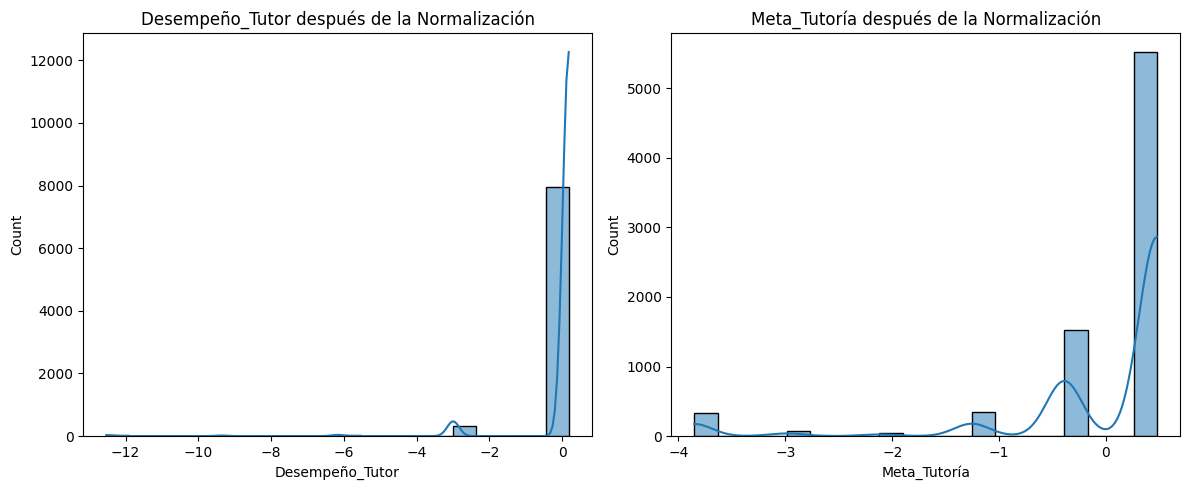

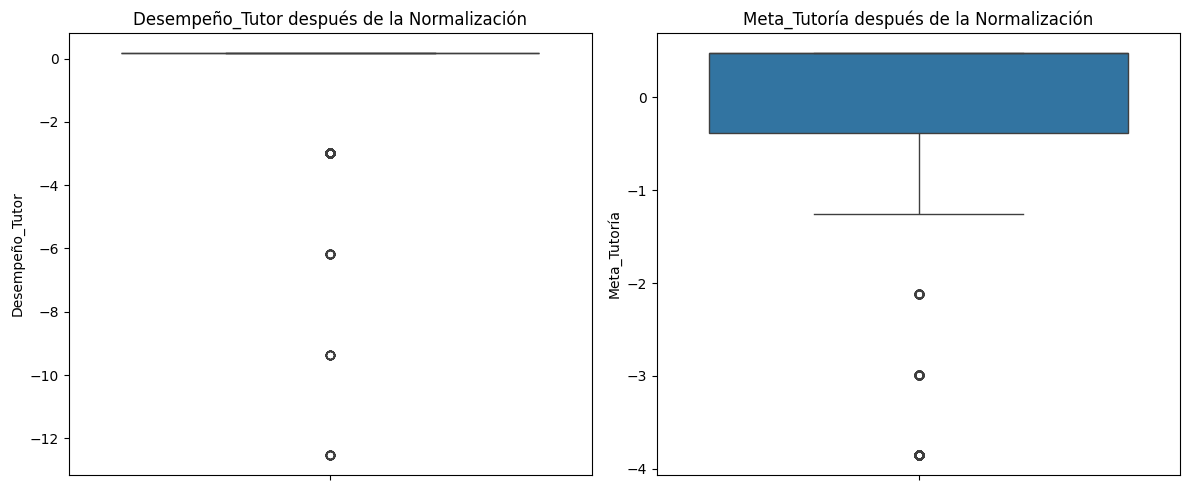

In [72]:
# Histograma de Desempeño_Tutor y Meta_Tutoría después de la normalización
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Desempeño_Tutor'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Desempeño_Tutor después de la Normalización')
sns.histplot(df['Meta_Tutoría'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Meta_Tutoría después de la Normalización')

plt.tight_layout()
plt.show()

# Boxplot de las variables normalizadas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=df['Desempeño_Tutor'], ax=axes[0])
axes[0].set_title('Desempeño_Tutor después de la Normalización')
sns.boxplot(y=df['Meta_Tutoría'], ax=axes[1])
axes[1].set_title('Meta_Tutoría después de la Normalización')

plt.tight_layout()
plt.show()

# Transformación - Box-Cox

La transformación de Box-Cox es una técnica de normalización que puede ser utilizada para corregir sesgos en la distribución de los datos, haciéndolos más "simétricos". Esto es útil para cumplir con los supuestos de los modelos estadísticos que esperan que los datos sigan una distribución normal.

En nuestro caso, aplicamos la transformación de Box-Cox a 'Desempeño_Tutor' para asegurarnos de que esta variable tenga una distribución que sea más adecuada para el modelado. Esto podría mejorar la precisión del modelo y hacer que los resultados sean más confiables.

In [73]:
from scipy import stats

In [74]:
# Eliminar valores NaN o infinitos en la columna
df['Desempeño_Tutor'] = df['Desempeño_Tutor'].replace([np.inf, -np.inf], np.nan)
df['Desempeño_Tutor'] = df['Desempeño_Tutor'].fillna(df['Desempeño_Tutor'].median())

# Confirmar que todos los valores sean positivos
if (df['Desempeño_Tutor'] <= 0).any():
    df['Desempeño_Tutor'] += 1 - df['Desempeño_Tutor'].min()

# Aplicar la transformación de Box-Cox
df['Desempeño_Tutor_boxcox'], _ = stats.boxcox(df['Desempeño_Tutor'])

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

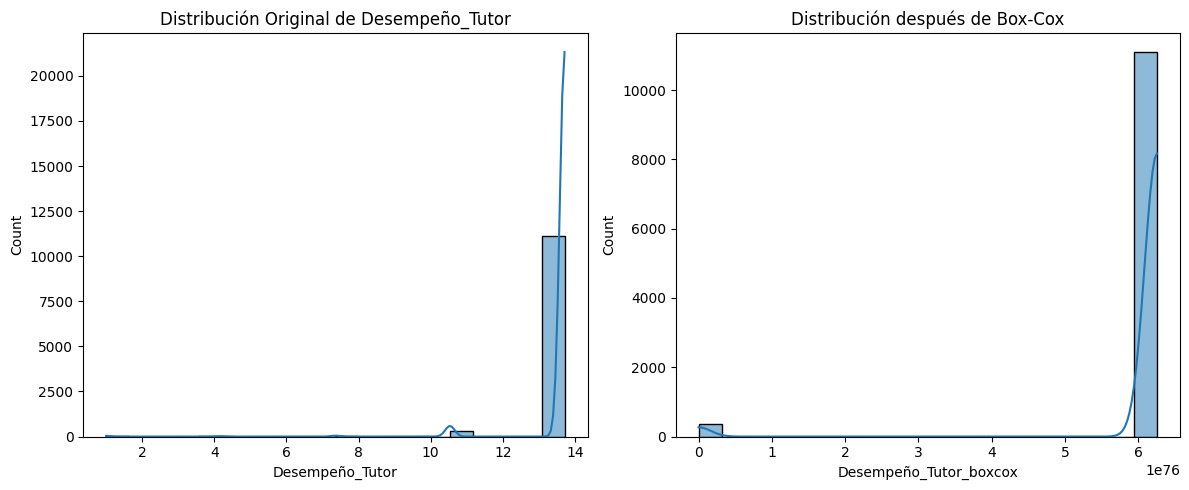

In [76]:
# Visualizar la distribución original y la transformada de 'Desempeño_Tutor'
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['Desempeño_Tutor'], bins=20, kde=True, ax=ax[0])
ax[0].set_title('Distribución Original de Desempeño_Tutor')

sns.histplot(df['Desempeño_Tutor_boxcox'], bins=20, kde=True, ax=ax[1])
ax[1].set_title('Distribución después de Box-Cox')

plt.tight_layout()
plt.show()

# Discretización o binning

La discretización ayuda a identificar rápidamente los tutores y las sesiones de tutoría que cumplen con umbrales de calidad 'alta' versus 'baja', facilitando análisis agregados o comparativos.

Además, al transformar estas variables numéricas en categóricas simplificadas, se puede facilitar el cruce basadas en grupos específicos identificados a través de estas categorías.

In [77]:
bins = [0, 3.5, 5]  # Define los límites para dividir las calificaciones en 'Bajo' y 'Alto'
labels = ['Bajo', 'Alto']
df['Desempeño_Tutor_Cat'] = pd.cut(df['Desempeño_Tutor'], bins=bins, labels=labels)
df['Meta_Tutoría_Cat'] = pd.cut(df['Meta_Tutoría'], bins=bins, labels=labels)

Bajo    21
Alto    12
Name: Desempeño_Tutor_Cat, dtype: int64
Bajo    5520
Alto       0
Name: Meta_Tutoría_Cat, dtype: int64


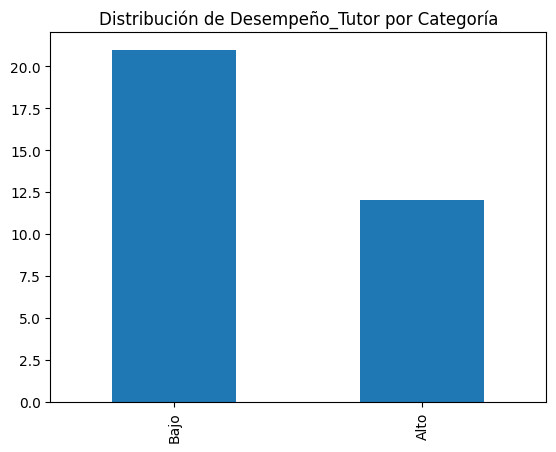

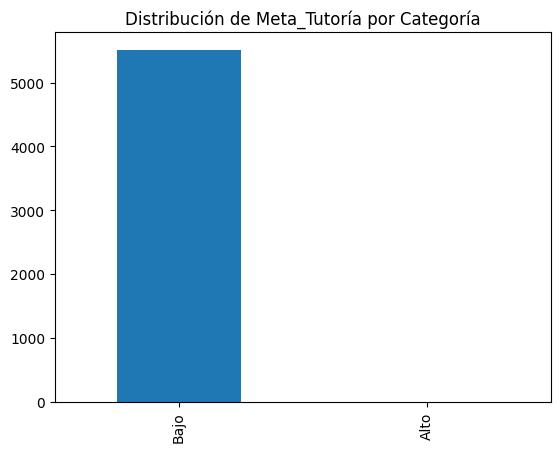

In [78]:
# Conteo de valores en las nuevas categorías
print(df['Desempeño_Tutor_Cat'].value_counts())
print(df['Meta_Tutoría_Cat'].value_counts())

# Visualización con gráficos de barras
df['Desempeño_Tutor_Cat'].value_counts().plot(kind='bar', title='Distribución de Desempeño_Tutor por Categoría')
plt.show()

df['Meta_Tutoría_Cat'].value_counts().plot(kind='bar', title='Distribución de Meta_Tutoría por Categoría')
plt.show()

# Generación de nuevas características

Generar nuevas características puede aportar información adicional que no está explícitamente presente en las variables proporcionadas.

El resultado del cruce 'Desempeño_Tutor' y 'Meta_Tutoría' (el desempeño numérico del tutor con la percepción del alumno sobre el éxito de la tutoría), ayuda a resaltar situaciones en las que altas calificaciones de desempeño coinciden con una alta satisfacción del objetivo de la tutoría, lo cual podría ser un indicador potencial de un tutor con experiencia en conocimiento específicos.

In [79]:
# Generar una nueva característica que sea el producto de 'Desempeño_Tutor' y 'Meta_Tutoría' para capturar la relación entre el desempeño del tutor y la percepción del alumno sobre si se alcanzaron los objetivos de la tutoría
df['desempeño_meta_product'] = df['Desempeño_Tutor'] * df['Meta_Tutoría']

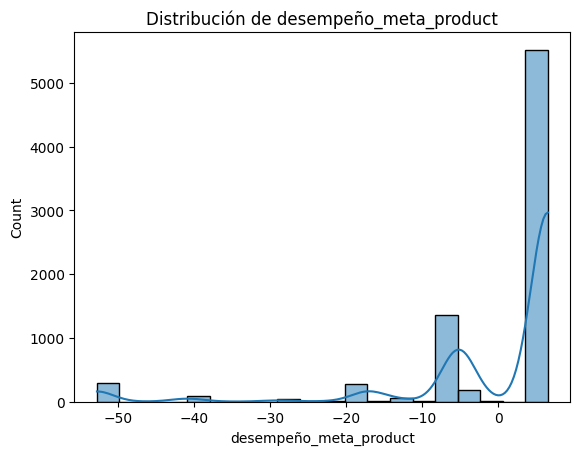

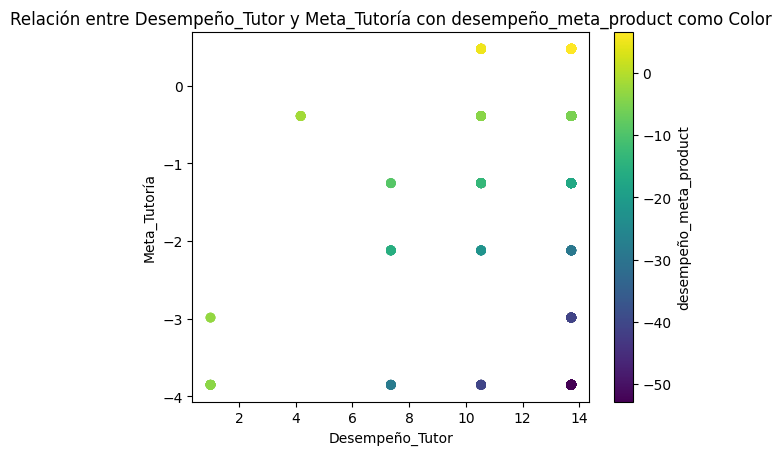

In [80]:
# Histograma de la nueva característica
sns.histplot(df['desempeño_meta_product'], bins=20, kde=True)
plt.title('Distribución de desempeño_meta_product')
plt.show()

# Scatter plot (si es relevante ver la relación entre las dos variables originales y el producto)
plt.scatter(df['Desempeño_Tutor'], df['Meta_Tutoría'], c=df['desempeño_meta_product'])
plt.colorbar().set_label('desempeño_meta_product')
plt.xlabel('Desempeño_Tutor')
plt.ylabel('Meta_Tutoría')
plt.title('Relación entre Desempeño_Tutor y Meta_Tutoría con desempeño_meta_product como Color')
plt.show()

# Métodos de filtrado

Visualización de la correlación entre las variables antes del filtrado.

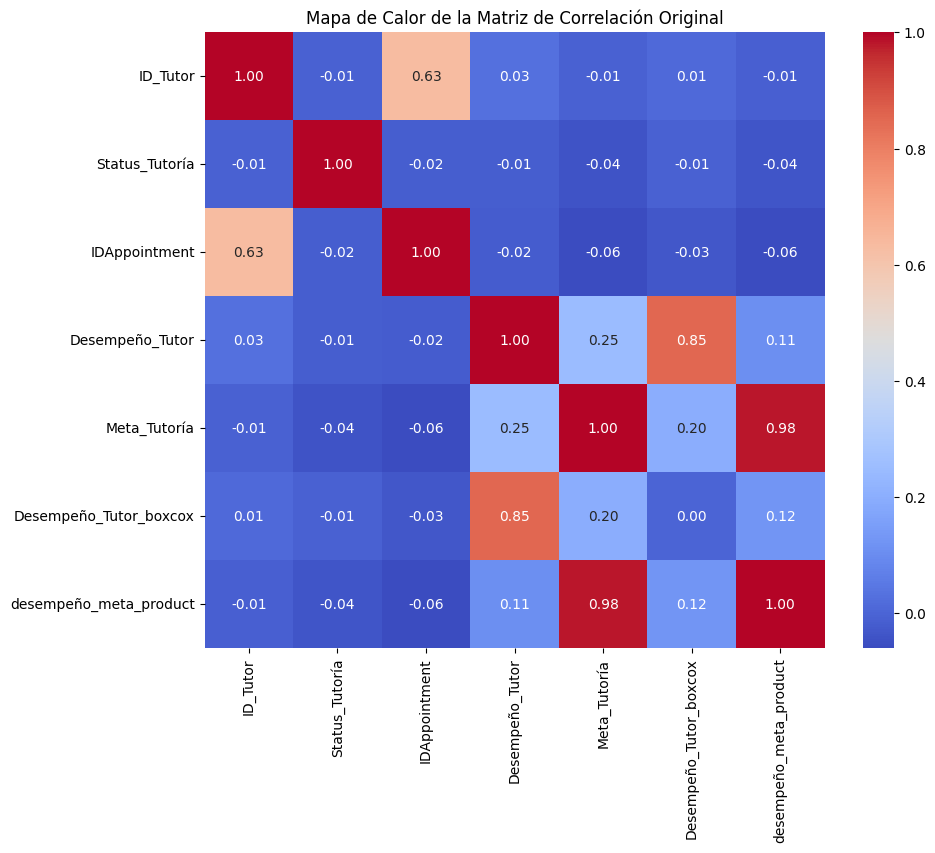

In [81]:
correlation_matrix_original = df.corr(numeric_only=True)

# Crear un mapa de calor para la matriz de correlación original
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_original, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de la Matriz de Correlación Original")
plt.show()

La variable de Status_Tutoría tiene baja correlación con las otras variables en el conjunto de datos.

Características a eliminar por alta correlación:
{'Desempeño_Tutor_boxcox', 'desempeño_meta_product'}


<ipython-input-82-94022f4b4a13>:29: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_reduced.corr(), annot=True, cmap='coolwarm', fmt=".2f")


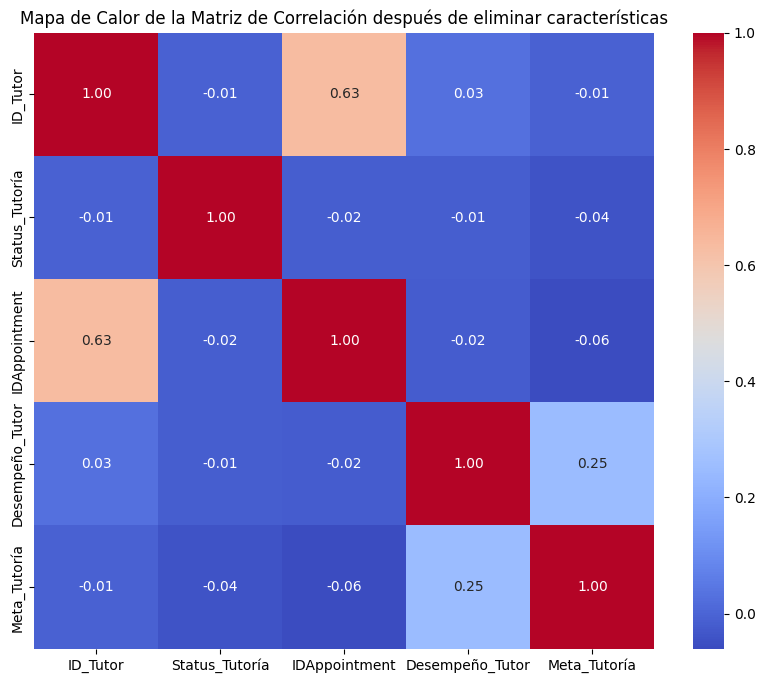

In [82]:
# Calcular la matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Establecer un umbral
threshold = 0.8

# Encontrar pares de características altamente correlacionadas y eliminar el menos relevante para recomendaciones de empleo
to_remove = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            idx_i = correlation_matrix.columns[i]
            idx_j = correlation_matrix.columns[j]
            # Eliminar la característica menos relevante
            if abs(correlation_matrix.loc[idx_i, 'Status_Tutoría']) < abs(correlation_matrix.loc[idx_j, 'Status_Tutoría']):
                to_remove.add(idx_i)
            else:
                to_remove.add(idx_j)

# Mostrar las características a eliminar
print("Características a eliminar por alta correlación:")
print(to_remove)

# Eliminar las características altamente correlacionadas
df_reduced = df.drop(columns=to_remove)

# Crear un heatmap de la matriz de correlación reducida
plt.figure(figsize=(10, 8))
sns.heatmap(df_reduced.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de la Matriz de Correlación después de eliminar características")
plt.show()

# Conclusión Ingeniería de Características

En el ejercicio anterior, se ha llevado a cabo una serie de pasos con el objetivo de mejorar la representatividad y la calidad de los datos. La creación de nuevas características, como el producto de Desempeño_Tutor y Meta_Tutoría y la transformación de Box-Cox de Desempeño_Tutor, se realizó para captar interacciones complejas y normalizar distribuciones. Sin embargo, el análisis de correlación posterior sugirió que estas nuevas características estaban altamente correlacionadas con otras ya existentes en el conjunto de datos.

La recomendación de: "utilizar métodos de filtrado para la selección de características y técnicas de extracción de características, permitiendo reducir los requerimientos de almacenamiento, la complejidad del modelo y el tiempo de entrenamiento." debe tomarse con precaución, considerando tanto el análisis estadístico como el conocimiento del dominio. En este caso, las características derivadas fueron eliminadas debido a su alta correlación, lo que podría indicar redundancia. No obstante, la utilidad de estas características no se descarta por completo y debe ser evaluada en el contexto de un modelo predictivo.

En relación con la variable Status_Tutoría, una baja correlación no significa necesariamente que la variable deba eliminarse. Sin embargo, es importante considerar el contexto y la relevancia que podría tener en la recomendación de empleos. De acuerdo con el conocimiento del negocio, el entendimiento de los datos, la meta del análisis y el objetivo de filtrado, la hipótesis por el momento es eliminarla.

La conclusión es que, al desarrollar el modelo de recomendación final, se realizarán pruebas tanto con como sin estas características derivadas para determinar su impacto real en el rendimiento del modelo. Esta estrategia asegura que se tomen decisiones basadas en evidencia y se obtenga el modelo más eficiente y efectivo posible para el proyecto en cuestión.